In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

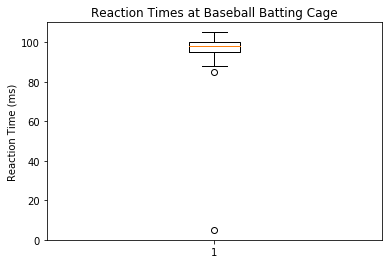

In [4]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

In [5]:
# We need to sort the data to determine which could be outliers
times.sort()
print(times)

[5, 85, 88, 95, 96, 97, 98, 98, 100, 100, 101, 102, 105]


NameError: name 'temperature_df' is not defined

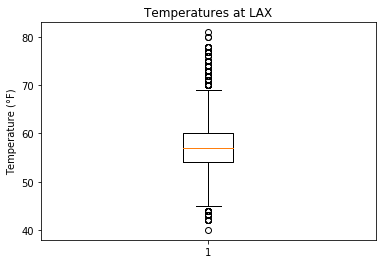

In [8]:
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

In [9]:
temperature_df

,STATION,DATE,REPORT_TYPE,HourlyDryBulbTemperature
0,72295023174,2019-01-01T00:49:00,FM-16,52
1,72295023174,2019-01-01T00:53:00,FM-15,51
2,72295023174,2019-01-01T01:53:00,FM-15,52
3,72295023174,2019-01-01T02:53:00,FM-15,49
4,72295023174,2019-01-01T03:53:00,FM-15,43
5,72295023174,2019-01-01T04:00:00,FM-12,43
6,72295023174,2019-01-01T04:53:00,FM-15,46
7,72295023174,2019-01-01T05:53:00,FM-15,47
8,72295023174,2019-01-01T06:53:00,FM-15,44
9,72295023174,2019-01-01T07:53:00,FM-15,47


In [5]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.0
The upper quartile of temperatures is: 60.0
The interquartile range of temperatures is: 6.0
The the median of temperatures is: 57.0 
Values below 45.0 could be outliers.
Values above 69.0 could be outliers.


In [ ]:
Average Weekly Wages